In [174]:
import pandas as pd
import numpy as np
import os as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [175]:
pwd = os.getcwd()
hapiness_path = os.path.join(pwd,"worldwide_happiness_report.csv" )
covid_path = os.path.join(pwd,"owid-covid-data.csv")

In [176]:
covid_df = pd.read_csv(covid_path)
hapiness_df = pd.read_csv(hapiness_path)

In [177]:
hapiness_df.set_index(['Country or region'],inplace=True)

In [178]:
hapiness_df

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [179]:
covid_df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101993,ZWE,Africa,Zimbabwe,2021-07-08,62383.0,2156.0,1594.571,2029.0,56.0,31.571,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101994,ZWE,Africa,Zimbabwe,2021-07-09,65066.0,2683.0,1771.857,2084.0,55.0,34.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101995,ZWE,Africa,Zimbabwe,2021-07-10,66853.0,1787.0,1884.000,2126.0,42.0,38.143,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
101996,ZWE,Africa,Zimbabwe,2021-07-11,67765.0,912.0,1898.714,2185.0,59.0,43.857,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [181]:
covid_df["%infected"] = covid_df["total_cases"]/covid_df["population"]*100
covid_df["%death"] = covid_df["total_deaths"]/covid_df["population"]*100
covid_df["%vaccination"] = covid_df["total_vaccinations"]/covid_df["population"]*100
covid_df["%age_65_older"] = covid_df["aged_65_older"] + covid_df['aged_70_older']


In [182]:
cols = ['continent', 'location','population','%age_65_older','extreme_poverty','%infected', '%death', '%vaccination']

In [183]:
covid_by_country = covid_df[cols][covid_df["continent"].notnull()].groupby('location').max().sort_values(by=['%infected'],ascending=False)

In [184]:
covid_by_overall = covid_df[cols][covid_df["continent"].isnull()].drop(columns="continent").groupby('location').max().sort_values(by=['%infected'],ascending=False)


In [185]:
covid_by_overall

,population,%age_65_older,extreme_poverty,%infected,%death,%vaccination
location,,,,,,
South America,4.307598e+08,NaN,NaN,7.902679,0.241098,49.789817
European Union,4.449191e+08,NaN,NaN,7.441487,0.166674,91.616557
North America,5.920722e+08,NaN,NaN,6.775272,0.153481,77.096673
Europe,7.486801e+08,NaN,NaN,6.586073,0.149150,75.251899
World,7.794799e+09,14.051,10.0,2.402095,0.051815,44.519539
Asia,4.639847e+09,NaN,NaN,1.244128,0.017702,46.721205
Africa,1.340598e+09,NaN,NaN,0.446411,0.011369,4.237844
Oceania,4.267781e+07,NaN,NaN,0.147311,0.002756,26.395369
International,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
covid_by_country

,continent,population,%age_65_older,extreme_poverty,%infected,%death,%vaccination
location,,,,,,,
Andorra,Europe,77265.0,NaN,NaN,18.320067,0.164369,88.434608
Seychelles,Africa,98340.0,14.192,1.1,17.292048,0.078300,141.981900
Montenegro,Europe,628062.0,24.157,1.0,15.999694,0.258096,48.169448
Bahrain,Asia,1701583.0,3.759,NaN,15.710312,0.080983,129.354842
Czechia,Europe,10708982.0,30.607,NaN,15.589680,0.283230,84.620957
...,...,...,...,...,...,...,...
Tonga,Oceania,105697.0,9.852,NaN,NaN,NaN,27.121867
Turkmenistan,Asia,6031187.0,6.818,NaN,NaN,NaN,0.696264
Turks and Caicos Islands,North America,38718.0,NaN,NaN,NaN,NaN,117.108322


In [187]:
df_merge = covid_by_country.join(hapiness_df,how="inner").sort_values(by=[])

In [188]:
df_merge.reset_index(inplace=True)
df_merge.rename(columns={'index':"Country"},inplace=True)

In [190]:
df_merge

,Country,continent,population,%age_65_older,extreme_poverty,%infected,%death,%vaccination,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Montenegro,Europe,6.280620e+05,24.157,1.0,15.999694,0.258096,48.169448,73,5.523,1.051,1.361,0.871,0.197,0.142,0.080
1,Bahrain,Asia,1.701583e+06,3.759,NaN,15.710312,0.080983,129.354842,37,6.199,1.362,1.368,0.871,0.536,0.255,0.110
2,Slovenia,Europe,2.078932e+06,31.992,NaN,12.404206,0.212850,76.662248,44,6.118,1.258,1.523,0.953,0.564,0.144,0.057
3,Luxembourg,Europe,6.259760e+05,24.154,0.2,11.543094,0.130836,98.229325,14,7.090,1.609,1.479,1.012,0.526,0.194,0.316
4,Uruguay,South America,3.473727e+06,25.016,0.1,10.849327,0.167918,124.488251,33,6.293,1.124,1.465,0.891,0.523,0.127,0.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Niger,Africa,2.420664e+07,3.931,44.5,0.022878,0.000801,1.748839,114,4.628,0.138,0.774,0.366,0.318,0.188,0.102
145,China,Asia,1.439324e+09,16.570,0.7,0.006402,0.000322,96.672620,93,5.191,1.029,1.125,0.893,0.521,0.058,0.100
146,Tanzania,Africa,5.973421e+07,4.982,49.1,0.000852,0.000035,NaN,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
147,Northern Cyprus,Asia,NaN,NaN,NaN,NaN,NaN,NaN,64,5.718,1.263,1.252,1.042,0.417,0.191,0.162


TOP 10 COUNTRY WITH HIGHEST %INFECTED

(10.0, 16.79967901258156)

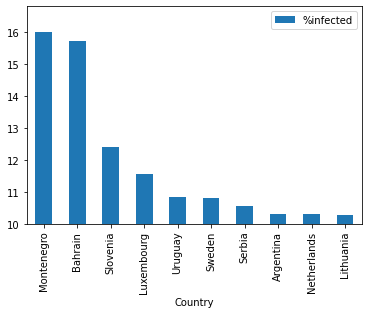

In [206]:
top10country_infected = df_merge[['Country',"%infected"]]
top10country.sort_values(by="%infected",ascending=False).head(10).plot.bar(x='Country')
plt.ylim(10)

(0.2, 0.6193538572271629)

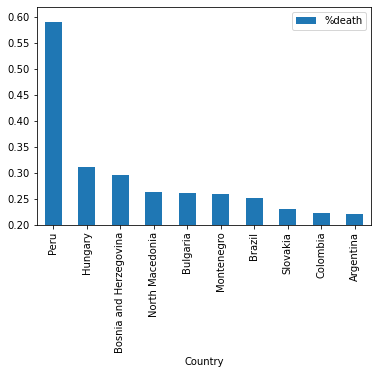

In [202]:
top10country_death= df_merge[['Country',"%death"]]
top10country_death.sort_values(by="%death",ascending=False).head(10).plot.bar(x='Country')
plt.ylim(0.2)

(110.0, 169.52896748362048)

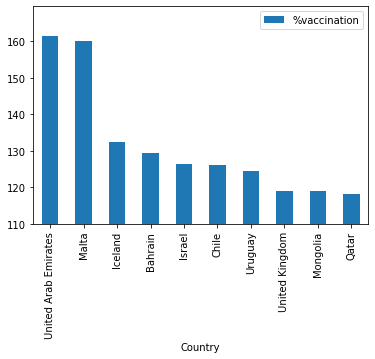

In [205]:
top10country_vaccination= df_merge[['Country',"%vaccination"]]
top10country_vaccination.sort_values(by="%vaccination",ascending=False).head(10).plot.bar(x='Country')
plt.ylim(110)

OLD PEOPLE - %DEATH

/home/thai/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='%age_65_older', ylabel='%death'>

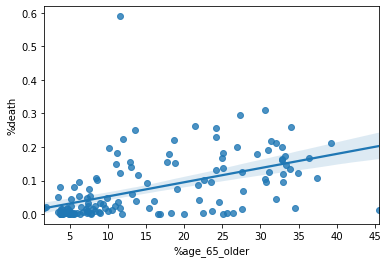

In [191]:
sns.regplot(df_merge['%age_65_older'],df_merge['%death'])

%INFECTED -- GDP

/home/thai/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP per capita', ylabel='%infected'>

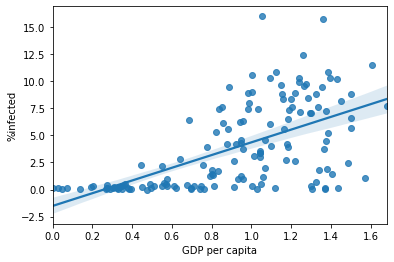

In [192]:
sns.regplot(df_merge['GDP per capita'],df_merge['%infected'])

%INFECTED -- SOCIAL SUPPORT

/home/thai/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Social support', ylabel='%infected'>

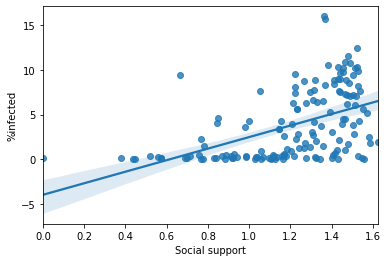

In [193]:
sns.regplot(df_merge['Social support'],df_merge['%infected'])
